<div class="alert alert-block alert-success">

<h1>Boolean variables and Propability</h1>

<h2>Topics:</h2>

<h2>basic Kolmogoroff axioms, foundations of Bayesian Networks</h2>

</div>

Assume, that -on average- you will have a good day ***GD*** ONLY if some events have happend which are necesssary to be true (or false). These are a sort of atomic events. Each event will only hold true with a certain probabilty.

E.a. you need to have a good breakfast ***B*** , which is true, if your coffee ***C*** tastes perfect (i.e. no rotten bean ***RB*** in it). Also your morning fruits ***F*** must all be perfect.

This would get modeled as: GOOD_BREAKFAST = NO ROTTEN_BEAN AND FRUITS_GOOD

On top your daily work must proceeded as wanted ***W***. 

Then in the evening ***E*** your favorit soccer team ***SW*** could win, which is almost always true except when they are playing Bayern München ***PBM***, the win is fairly unlikely, akak BM wins ***BMW***. The winning will compensate for a bad morning and a bad work day.

We want to model this situation, by taking all events as boolean variables (***GD,RB,B,C,F,W,SW,PBM,BMW***), all of which hold true with a certain probability.

In our example:

\begin{align}
 x_{GD} &= \left( x_B \wedge x_W \right) \vee x_{E} \\
 &= \left( \left(\overline{x_{RB}} \wedge x_F \right) \wedge x_W \right) \vee  
 \left( x_{SW} \wedge \overline{x_{PBM}} \right) \vee \overline{x_{BMW}} \label{eq1} \\
\end{align}

Question: 

How many times will you have good working day (assume: every evening there is a game) ?

---

Answer:

Now in SW we model all boolean variables as (name, value) tuples, value is the probabilty that they happen to be true.


In [3]:
#import numpy as np

xRB = ('RottenBean',0.001); #MY NEW data type prob.boolean vars: tuple(value, probability)
xF = ('FruitsOK',0.9)

print(xRB)
print(xF)

('RottenBean', 0.001)
('FruitsOK', 0.9)


We have negated variables, so better write program, which is the ***complement*** operator:

In [5]:
def myCOMPLEMENT(myVar):
    '''Returns the compement of the boolean variable

    Keyword arguments:
    mVar -- tuple : (Name, prob.)
    
    returns (Name, 1-prob)
    '''
    ### BEGIN SOLUTION
    
    return (myVar[0],1-myVar[1])

In [15]:
myNew = myCOMPLEMENT(xRB)
myNew

('RottenBean', 0.999)

In [16]:
myNewNew = myCOMPLEMENT(myNew)

In [17]:
xRB  == myNewNew


False

This is strange, can you find the reason ? Hint: print both boolean vars! Then goto the web and seek ```python isclose```

Second way to deal with this: use the number type ```Fractions```insted of reals. Thus check an import like <p> ```from fractions import Fraction```


In [18]:
from math import isclose
isclose(xRB[1],myNewNew[1])

True

In [19]:
def myAND(myVar1,myVar2):
    '''Returns a probalistic AND on two boolean variable

    Keyword arguments:
    myVar1,myVar2 -- two tuples : (Name, prob.)
    
    returns:: the probabilty tuple of both being true (on average)
    '''
    ### BEGIN SOLUTION
    
    return (myVar1[0] + '_A_'+ myVar2[0],myVar1[1]*myVar2[1])

def myOR(myVar1,myVar2):
    '''Returns a probalistic OR of two boolean variable

    Keyword arguments:
    myVar1,myVar2 -- two tuples : (Name, prob.)
    
    returns:: the probabilty tuple of ONE of them being true
    '''
    ### BEGIN SOLUTION
    return (myVar1[0] + '_O_' + myVar2[0],myVar1[1] + myVar2[1] - myVar1[1]*myVar2[1])
#    else:
#        raise AttributeError()


In [20]:
mytemp = myAND(xRB,xF)
mytemp

('RottenBean_A_FruitsOK', 0.0009000000000000001)

In [21]:
mytemp = myOR(xRB,xF)
mytemp

('RottenBean_O_FruitsOK', 0.9001)

In [22]:
x1 = ('Sure',1.0); #MY NEW data type prob.boolean vars: tuple(value, probability)
x2 = ('Impossible',0.0)
mytemp = myCOMPLEMENT(x1)
print(mytemp)

('Sure', 0.0)


This looks bizzare: an event called 'Sure', which is never true. Should we CHANGE our implentation to respect this?

How? 

Before you ***CHANGE*** things better have some unit-test cases at hand...

In [23]:
mytemp = myAND(x1,x2);print("case 0,0 : ",mytemp)
mytemp = myAND(myCOMPLEMENT(x1),x2);print("case -,0 : ",mytemp)
mytemp = myAND(x1,myCOMPLEMENT(x2));print("case 0,- : ",mytemp)
mytemp = myAND(myCOMPLEMENT(x1),myCOMPLEMENT(x2));print("case -,- : ",mytemp)

case 0,0 :  ('Sure_A_Impossible', 0.0)
case -,0 :  ('Sure_A_Impossible', 0.0)
case 0,- :  ('Sure_A_Impossible', 1.0)
case -,- :  ('Sure_A_Impossible', 0.0)


Are all these results PLAUSIBLE / correct? The naming convention are really ugly...

Let's go back to the original problem: have a luck day...

In [25]:
xW = ('WorkedGood',0.74)
xSW = ('SoccerWin(NotBayern)',0.66)
xPBM = ('PlayBM',2.0/34.0)
xBMW = ('BMWins',25.0/34.0)

part1 = myAND(myAND(myCOMPLEMENT(xRB),xF),xW)
part2 = myAND(xSW,myCOMPLEMENT(xPBM))
part3 = myCOMPLEMENT(xBMW)

myall = myOR(myOR(part1,part2),part3)

In [1]:
myall

NameError: name 'myall' is not defined

So many times you would have a good day, what is the reason for this, what is the most dominat factor? See in the string: the full boolean euation is almost reproduced, thus debugging can be easy. Still it's not perfect...

NB: if we change the naming id would become perfect..

TASKS:

* generalize it to ALL boolean operations
* the result string does not fully represent the boolean expression:: fix the complement operation: it should ADD an "N" in front of the varibale name (and remove it when appearing TWICE!)
* OPTIONAL write a parser which parses a boolean expression and the vlaues of the atoms and then reproduces the results by starting from boolean equation See (\ref{eq1})
* OPTIONAL change the implementation : use numpy arrays (or own classes) instead

---

TASKS:

* apply the above mentioned functions to calculate the reliabilities for a series / parallel graph
* assume the boxes are like switches which have a certain realibility to work i.e. to conduct.
* two boxes in a sequence are modeled by "myAND", two in parallel by "myOR".
* taking 
  * P_K1 = 0.99 
  * P_K2 = 0.95 
  * P_K3 = 0.05 
  * P_K4 = 0.56 
* how propable is a connection from a to b ?

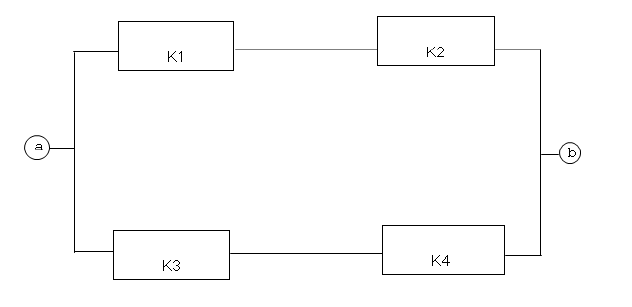

---

NEW NEW NEW NEW (additional on top)

TASK:

* program a dice as a function call :: myDice(NumFaces,repeatCount), where NumFaces is 4,6,8,10,12,20, returning a tupple of length repeatCount containig the sequence of ourcomes.
* print a statistic: for NumFaces = 6 and repeatCount =1200 all numbers appear roughly 1/6 of the times
* extend the experiment: use 2,3,4,5,6 die and define as the outcome the SUM on all faces (e.g. for 2 die the sample space is now {2,3,..., 11,12}
* build some new statistics: how likely are all the outcomes when using N dice?
* draw all statistics in ONE diagram, compare the functions
* can you find a relation between the outcomes? Hint: Wiki Faltung